In [3]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [4]:
caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w",]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]

In [5]:
def prepare_hh_dict(mem):
    hh_dict = {}
    if mem == "16KB":
        hh_dict["caida0517-500w"] = (31.5, 16.41, 192.12, "cs")
        hh_dict["caida0517-250w"] = (17.26, 10.83, 181.92, "cs")
        hh_dict["caida0517-150w"] = (12.97, 10.25, 177.01, "cs")
        hh_dict["caida0517-070w"] = (7.04, 7.16, 101.93, "cm")
        hh_dict["caida0517-030w"] = (4.02, 3.80, 68.62, "cs")
        hh_dict["zipf2a-150w"] = (6.54, 8.84, 168.38, "cm")
        hh_dict["zipf2a-070w"] = (4.07, 4.97, 139.53, "cm")
        hh_dict["zipf2a-030w"] = (3.70, 4.35, 96.37, "cm")
        hh_dict["zipf10-070w"] = (5.49, 9.15, 74.44, "cm")
        hh_dict["zipf10-030w"] = (1.83, 6.43, 62.33, "cm")
    elif mem == "32KB":
        hh_dict["caida0517-500w"] = (11.49, 7.31, 100.92, "cs")
        hh_dict["caida0517-250w"] = (5.92, 4.44, 75.71, "cs")
        hh_dict["caida0517-150w"] = (5.40, 5.54, 61.42, "cm")
        hh_dict["caida0517-070w"] = (2.22, 4.12, 34.03, "cm")
        hh_dict["caida0517-030w"] = (1.28, 1.86, 25.52, "cm")
        hh_dict["zipf2a-150w"] = (2.37, 1.96, 93.53, "cs")
        hh_dict["zipf2a-070w"] = (1.47, 1.451, 91.07, "cs")
        hh_dict["zipf2a-030w"] = (1.23, 1.02, 45.23, "cs")
        hh_dict["zipf10-070w"] = (1.34, 3.32, 41.41, "cm")
        hh_dict["zipf10-030w"] = (0.23, 2.43, 25.23, "cm")
    elif mem == "64KB":
        hh_dict["caida0517-500w"] = (3.76, 3.43, 54.25, "cs")
        hh_dict["caida0517-250w"] = (2.11, 1.70, 26.64, "cs")
        hh_dict["caida0517-150w"] = (1.58, 1.70, 26.99, "cm")
        hh_dict["caida0517-070w"] = (0.61, 1.87, 12.71, "cm")
        hh_dict["caida0517-030w"] = (0.26, 0.83, 12.42, "cm")
        hh_dict["zipf2a-150w"] = (0.88, 0.90, 64.11, "cm")
        hh_dict["zipf2a-070w"] = (0.52, 0.51, 51.03, "cs")
        hh_dict["zipf2a-030w"] = (0.43, 0.33, 27.70, "cs")
        hh_dict["zipf10-070w"] = (0.42, 1.61, 19.48, "cm")
        hh_dict["zipf10-030w"] = (0.01, 0.10, 8.07, "cm")
    elif mem == "128KB":
        hh_dict["caida0517-500w"] = (1.16, 1.35, 18.70, "cm")
        hh_dict["caida0517-250w"] = (0.84, 1.14, 6.71, "cm")
        hh_dict["caida0517-150w"] = (0.60, 0.97, 8.85, "cm")
        hh_dict["caida0517-070w"] = (0.15, 0.50, 4.98, "cm")
        hh_dict["caida0517-030w"] = (0.04, 0.21, 2.86, "cm")
        hh_dict["zipf2a-150w"] = (0.36, 0.35, 31.17, "cs")
        hh_dict["zipf2a-070w"] = (0.21, 0.43, 16.58, "cm")
        hh_dict["zipf2a-030w"] = (0.13, 0.17, 12.94, "cm")
        hh_dict["zipf10-070w"] = (0.01, 0.72, 1.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.01, 2.84, "cm")
    elif mem == "256KB":
        hh_dict["caida0517-500w"] = (0.44, 0.75, 7.14, "cm")
        hh_dict["caida0517-250w"] = (0.21, 0.58, 2.74, "cm")
        hh_dict["caida0517-150w"] = (0.09, 0.36, 3.34, "cm")
        hh_dict["caida0517-070w"] = (0.04, 0.20, 2.72, "cm")
        hh_dict["caida0517-030w"] = (0.01, 0.06, 0.66, "cm")
        hh_dict["zipf2a-150w"] = (0.14, 0.11, 12.04, "cs")
        hh_dict["zipf2a-070w"] = (0.07, 0.08, 3.83, "cm")
        hh_dict["zipf2a-030w"] = (0.05, 0.07, 1.11, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.09, 0.82, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 1.02, "cm")
    elif mem == "512KB":
        hh_dict["caida0517-500w"] = (0.12, 0.20, 3.62, "cm")
        hh_dict["caida0517-250w"] = (0.04, 0.12, 0.84, "cm")
        hh_dict["caida0517-150w"] = (0.36, 0.16, 0.84, "cs")
        hh_dict["caida0517-070w"] = (0.01, 0.03, 0.40, "cm")
        hh_dict["caida0517-030w"] = (0.0, 0.01, 0.08, "cm")
        hh_dict["zipf2a-150w"] = (0.04, 0.05, 1.50, "cm")
        hh_dict["zipf2a-070w"] = (0.02, 0.04, 2.64, "cm")
        hh_dict["zipf2a-030w"] = (0.01, 0.02, 0.36, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.01, 0.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 0.32, "cm")
        
    return hh_dict

In [6]:
def prepare_fsd_dict(mem):
    fsd_dict = {}
    if mem == "16KB":
        fsd_dict["caida0517-500w"] = (1.82, 1.54, "cs")
        fsd_dict["caida0517-250w"] = (1.54, 1.36, "cs")
        fsd_dict["caida0517-150w"] = (1.41, 1.24, "cs")
        fsd_dict["caida0517-070w"] = (1.06, 0.96, "cs")
        fsd_dict["caida0517-030w"] = (0.96, 0.87, "cs")
        fsd_dict["zipf2a-150w"] = (1.33, 1.10, "cs")
        fsd_dict["zipf2a-070w"] = (1.17, 0.97, "cs")
        fsd_dict["zipf2a-030w"] = (1.22, 0.82, "cs")
        fsd_dict["zipf10-070w"] = (0.82, 0.90, "cm")
        fsd_dict["zipf10-030w"] = (0.40, 0.55, "cm")
    elif mem == "32KB":
        fsd_dict["caida0517-500w"] = (1.61, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.35, 1.18, "cs")
        fsd_dict["caida0517-150w"] = (1.09, 1.07, "cs")
        fsd_dict["caida0517-070w"] = (0.91, 0.87, "cs")
        fsd_dict["caida0517-030w"] = (0.69, 0.66, "cs")
        fsd_dict["zipf2a-150w"] = (1.44, 1.02, "cs")
        fsd_dict["zipf2a-070w"] = (1.07, 0.82, "cs")
        fsd_dict["zipf2a-030w"] = (0.94, 0.69, "cs")
        fsd_dict["zipf10-070w"] = (0.43, 0.61, "cm")
        fsd_dict["zipf10-030w"] = (0.14, 0.31, "cm")
    elif mem == "64KB":
        fsd_dict["caida0517-500w"] = (1.35, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.14, 1.13, "cs")
        fsd_dict["caida0517-150w"] = (1.01, 0.96, "cs")
        fsd_dict["caida0517-070w"] = (0.81, 0.71, "cs")
        fsd_dict["caida0517-030w"] = (0.45, 0.51, "cm")
        fsd_dict["zipf2a-150w"] = (1.03, 0.98, "cs")
        fsd_dict["zipf2a-070w"] = (0.86, 0.74, "cs")
        fsd_dict["zipf2a-030w"] = (0.71, 0.56, "cs")
        fsd_dict["zipf10-070w"] = (0.16, 0.38, "cm")
        fsd_dict["zipf10-030w"] = (0.03, 0.15, "cm")
    elif mem == "128KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.24, "cm")
        fsd_dict["caida0517-250w"] = (1.07, 1.05, "cs")
        fsd_dict["caida0517-150w"] = (0.89, 0.89, "cm")
        fsd_dict["caida0517-070w"] = (0.55, 0.66, "cm")
        fsd_dict["caida0517-030w"] = (0.24, 0.35, "cm")
        fsd_dict["zipf2a-150w"] = (0.94, 0.89, "cs")
        fsd_dict["zipf2a-070w"] = (0.79, 0.68, "cs")
        fsd_dict["zipf2a-030w"] = (0.49, 0.45, "cs")
        fsd_dict["zipf10-070w"] = (0.03, 0.15, "cm")
        fsd_dict["zipf10-030w"] = (0.01, 0.04, "cm")
    elif mem == "256KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.16, "cs")
        fsd_dict["caida0517-250w"] = (1.00, 0.95, "cs")
        fsd_dict["caida0517-150w"] = (0.70, 0.78, "cm")
        fsd_dict["caida0517-070w"] = (0.26, 0.42, "cm")
        fsd_dict["caida0517-030w"] = (0.07, 0.17, "cm")
        fsd_dict["zipf2a-150w"] = (0.93, 0.83, "cs")
        fsd_dict["zipf2a-070w"] = (0.58, 0.58, "cs")
        fsd_dict["zipf2a-030w"] = (0.23, 0.35, "cm")
        fsd_dict["zipf10-070w"] = (0.01, 0.05, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")
    elif mem == "512KB":
        fsd_dict["caida0517-500w"] = (1.07, 1.12, "cm")
        fsd_dict["caida0517-250w"] = (0.57, 0.76, "cm")
        fsd_dict["caida0517-150w"] = (0.36, 0.55, "cm")
        fsd_dict["caida0517-070w"] = (0.08, 0.23, "cm")
        fsd_dict["caida0517-030w"] = (0.02, 0.09, "cm")
        fsd_dict["zipf2a-150w"] = (0.68, 0.72, "cm")
        fsd_dict["zipf2a-070w"] = (0.29, 0.42, "cm")
        fsd_dict["zipf2a-030w"] = (0.09, 0.18, "cm")
        fsd_dict["zipf10-070w"] = (0.0, 0.01, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")    
    
    return fsd_dict


In [7]:
def prepare_ent_dict(mem):
    ent_dict = {}
    if mem == "16KB":
        ent_dict["caida0517-500w"] = (23.56, 60.63, 233.84, "cm")
        ent_dict["caida0517-250w"] = (19.44, 51.58, 188.73, "cm")
        ent_dict["caida0517-150w"] = (16.82, 45.68, 189.01, "cm")
        ent_dict["caida0517-070w"] = (12.12, 35.31, 150.34, "cm")
        ent_dict["caida0517-030w"] = (8.91, 26.3, 111.77, "cm")
        ent_dict["zipf2a-150w"] = (15.68, 39.86, 278.91, "cm")
        ent_dict["zipf2a-070w"] = (12.29, 31.78, 193.12, "cm")
        ent_dict["zipf2a-030w"] = (10.08, 26.88, 166.64, "cm")
        ent_dict["zipf10-070w"] = (7.44, 24.09, 103.00, "cm")
        ent_dict["zipf10-030w"] = (4.47, 14.57, 50.20, "cm")
    elif mem == "32KB":
        ent_dict["caida0517-500w"] = (17.61, 50.30, 118.04, "cm")
        ent_dict["caida0517-250w"] = (13.93, 40.35, 101.52, "cm")
        ent_dict["caida0517-150w"] = (11.81, 35.72, 83.55, "cm")
        ent_dict["caida0517-070w"] = (7.74, 24.58, 69.20, "cm")
        ent_dict["caida0517-030w"] = (5.28, 16.82, 46.20, "cm")
        ent_dict["zipf2a-150w"] = (11.15, 31.64, 134.47, "cm")
        ent_dict["zipf2a-070w"] = (8.55, 25.25, 107.78, "cm")
        ent_dict["zipf2a-030w"] = (6.71, 21.09, 75.39, "cm")
        ent_dict["zipf10-070w"] = (4.24, 14.69, 48.55, "cm")
        ent_dict["zipf10-030w"] = (2.39, 8.06, 16.96, "cm")
    elif mem == "64KB":
        ent_dict["caida0517-500w"] = (12.64, 39.29, 52.38, "cm")
        ent_dict["caida0517-250w"] = (9.45, 30.20, 46.12, "cm")
        ent_dict["caida0517-150w"] = (7.67, 25.63, 36.71, "cm")
        ent_dict["caida0517-070w"] = (4.80, 16.94, 26.65, "cm")
        ent_dict["caida0517-030w"] = (2.91, 9.51, 13.70, "cm")
        ent_dict["zipf2a-150w"] = (7.86, 24.30, 69.31, "cm")
        ent_dict["zipf2a-070w"] = (5.80, 18.83, 53.18, "cm")
        ent_dict["zipf2a-030w"] = (4.31, 12.25, 35.69, "cm")
        ent_dict["zipf10-070w"] = (2.42, 8.31, 22.11, "cm")
        ent_dict["zipf10-030w"] = (1.27, 4.58, 8.50, "cm")
    elif mem == "128KB":
        ent_dict["caida0517-500w"] = (8.55, 29.86, 20.32, "cm")
        ent_dict["caida0517-250w"] = (6.12, 21.92, 14.85, "cm")
        ent_dict["caida0517-150w"] = (4.79, 17.49, 10.28, "cm")
        ent_dict["caida0517-070w"] = (2.75, 10.05, 9.27, "cm")
        ent_dict["caida0517-030w"] = (1.55, 5.47, 0.68, "univmon")
        ent_dict["zipf2a-150w"] = (5.31, 18.85, 32.06, "cm")
        ent_dict["zipf2a-070w"] = (3.80, 14.30, 18.54, "cm")
        ent_dict["zipf2a-030w"] = (2.56, 10.77, 11.13, "cm")
        ent_dict["zipf10-070w"] = (1.06, 3.57, 11.90, "cm")
        ent_dict["zipf10-030w"] = (0.51, 1.75, 1.26, "cm")
    elif mem == "256KB":
        ent_dict["caida0517-500w"] = (5.46, 21.10, 2.28, "univmon")
        ent_dict["caida0517-250w"] = (3.18, 14.52, 2.68, "univmon")
        ent_dict["caida0517-150w"] = (2.75, 10.77, 0.43, "univmon")
        ent_dict["caida0517-070w"] = (1.49, 5.91, 0.85, "univmon")
        ent_dict["caida0517-030w"] = (0.77, 2.90, 5.86, "cm")
        ent_dict["zipf2a-150w"] = (3.44, 14.26, 10.46, "cm")
        ent_dict["zipf2a-070w"] = (2.30, 10.01, 1.30, "univmon")
        ent_dict["zipf2a-030w"] = (1.47, 6.85, 1.36, "univmon")
        ent_dict["zipf10-070w"] = (1.03, 2.09, 9.29, "cm")
        ent_dict["zipf10-030w"] = (0.27, 0.71, 0.22, "univmon")
    elif mem == "512KB":
        ent_dict["caida0517-500w"] = (3.24, 13.81, 3.97, "cm")
        ent_dict["caida0517-250w"] = (2.08, 8.85, 7.92, "cm")
        ent_dict["caida0517-150w"] = (1.46, 6.20, 6.60, "cm")
        ent_dict["caida0517-070w"] = (0.73, 2.95, 2.45, "cm")
        ent_dict["caida0517-030w"] = (0.41, 1.59, 6.74, "cm")
        ent_dict["zipf2a-150w"] = (2.08, 9.64, 0.47, "univmon")
        ent_dict["zipf2a-070w"] = (1.27, 6.17, 3.51, "cm")
        ent_dict["zipf2a-030w"] = (0.81, 3.96, 4.36, "cm")
        ent_dict["zipf10-070w"] = (0.37, 1.03, 7.77, "cm")
        ent_dict["zipf10-030w"] = (0.17, 0.48, 0.25, "cm")


    return ent_dict


#### Fixed FSD, Changed TFS

In [53]:
def plot_hh_with_diff_tfs_linechart():
    mems = ['32KB', '64KB']
    x_ticks = ['500w', '250w', '150w', '70w', '30w']
    ## hh 
    res = []
    labels = []
    for key in mems:
        CM_ARE = []
        CS_ARE = []
        RE_ARE = []
        hh_res = prepare_hh_dict(key)
        for pcap1 in caida0517:
            CM_ARE.append(hh_res[pcap1][0])
            CS_ARE.append(hh_res[pcap1][1])
            RE_ARE.append(min(hh_res[pcap1][0],hh_res[pcap1][1]))
            
        res.append(CM_ARE)
        res.append(CS_ARE)
        res.append(RE_ARE)
        
        labels.append(f'CM-Only-{key}')        
        labels.append(f'CS-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor='none',linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('ARE')
    plt.title('The Impact of TFS Changes on ARE (CAIDA0517, HH)')
    plt.legend(ncol=2)
    
    plt.tight_layout()
    plt.show()   
        

In [65]:
def plot_fsd_with_diff_tfs_linechart():
    mems = ['128KB', '256KB']
    x_ticks = ['500w', '250w', '150w', '70w', '30w']
    ## fsd 
    res = []
    labels = []
    for key in mems:
        CM_WMRD = []
        CS_WMRD = []
        RE_WMRD = []
        fsd_res = prepare_fsd_dict(key)
        for pcap1 in caida0517:
            CM_WMRD.append(fsd_res[pcap1][0])
            CS_WMRD.append(fsd_res[pcap1][1])
            RE_WMRD.append(min(fsd_res[pcap1][0],fsd_res[pcap1][1]))
            
        res.append(CM_WMRD)
        res.append(CS_WMRD)
        res.append(RE_WMRD)
        
        labels.append(f'CM-Only-{key}')        
        labels.append(f'CS-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor='none',linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('WMRD')
    plt.title('The Impact of TFS Changes on WMRD (CAIDA0517, FSD)')
    plt.legend(ncol=2)
    
    plt.tight_layout()
    plt.show()   
        

In [68]:
def plot_ent_with_diff_tfs_linechart():
    mems = ['128KB', '256KB']
    x_ticks = ['500w', '250w', '150w', '70w', '30w']
    ## ent 
    res = []
    labels = []
    for key in mems:
        CM_RE = []
        CS_RE = []
        RE_RE = []
        ent_res = prepare_ent_dict(key)
        for pcap1 in caida0517:
            CM_RE.append(ent_res[pcap1][0])
            CS_RE.append(ent_res[pcap1][2])
            RE_RE.append(min(ent_res[pcap1][0],ent_res[pcap1][2]))
            
        res.append(CM_RE)
        res.append(CS_RE)
        res.append(RE_RE)
        
        labels.append(f'CM-Only-{key}')        
        labels.append(f'UnivMon-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor='none',linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('RE')
    plt.title('The Impact of TFS Changes on RE (CAIDA0517, ENT)')
    plt.legend(ncol=2)
    
    plt.tight_layout()
    plt.show()   
        

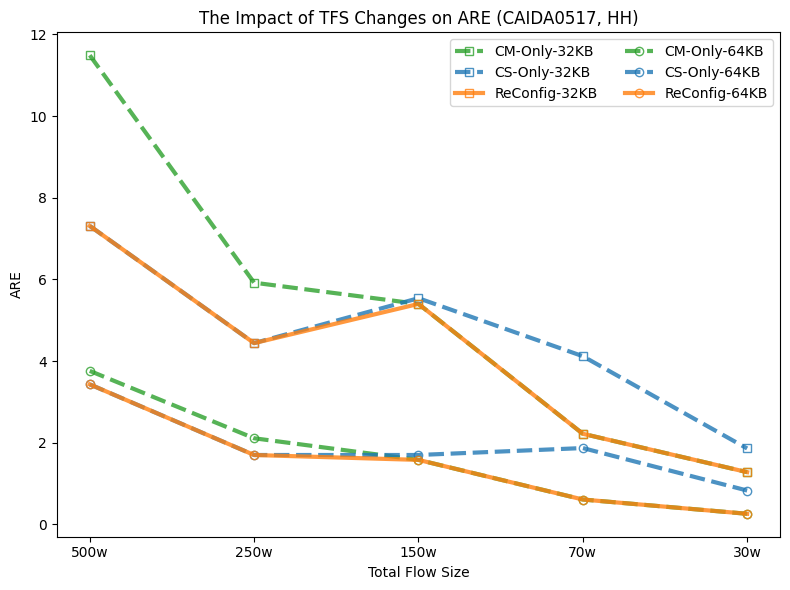

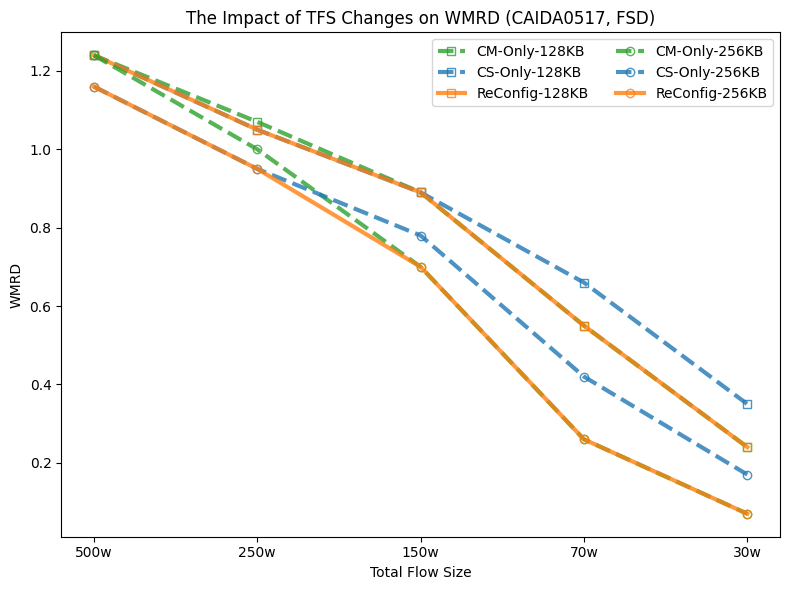

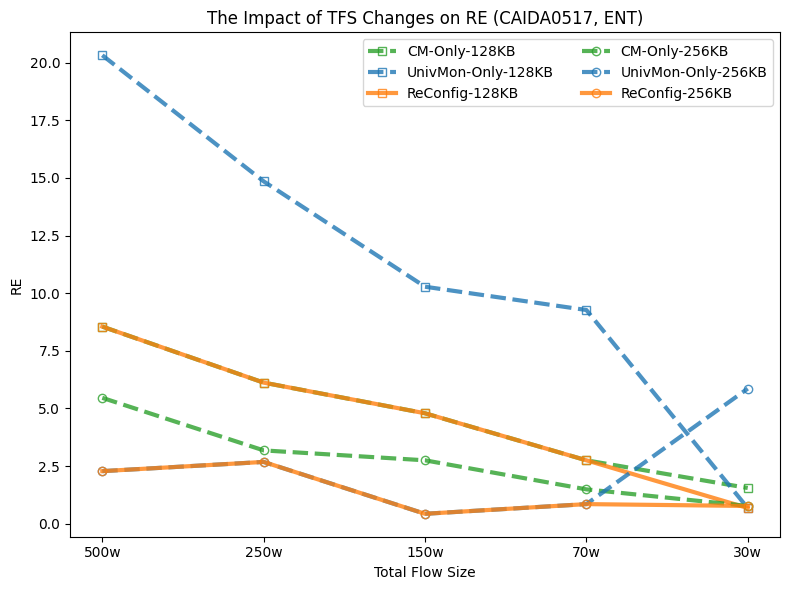

In [69]:
plot_hh_with_diff_tfs_linechart()
plot_fsd_with_diff_tfs_linechart()
plot_ent_with_diff_tfs_linechart()

#### Fixed TFS, Changes FSD

In [112]:
def plot_hh_with_diff_tfs_linechart(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]]):
    mems = ['64KB']
    # x_ticks = ['caida-70w','zipf1-70w','zipf2-70w','caida-30w','zipf1-30w','zipf2-30w']
    x_ticks = ['zipf1-70w','caida-70w','zipf2-70w','zipf1-30w','caida-30w','zipf2-30w']
    # dists = ['caida','zipf1','zipf2']
    dists = ['zipf1','caida','zipf2']
    x_ticks_mapping = {'zipf1':'zipf10', 'caida':'caida0517', 'zipf2':'zipf2a'}
    tfss = ['70w', '30w']
    ## hh 
    res = []
    labels = []
    for key in mems:
        hh_res = prepare_hh_dict(key)
        CM_ARE = []
        CS_ARE = []
        RE_ARE = []
        for tfs in tfss:
            for dist in dists:
                pcap1 = f'{x_ticks_mapping[dist]}-0{tfs}'
                CM_ARE.append(hh_res[pcap1][0])
                CS_ARE.append(hh_res[pcap1][1])
                RE_ARE.append(min(hh_res[pcap1][0],hh_res[pcap1][1]))
            
        res.append(CM_ARE)
        res.append(CS_ARE)
        res.append(RE_ARE)
    
        labels.append(f'CM-Only-{key}')        
        labels.append(f'CS-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o', 's', 'o']
    markerfacecolors = ['auto', 'auto', 'none', 'none']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor=markerfacecolors[i//3],linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('ARE')
    plt.title('The Impact of TFS Changes on ARE (CAIDA0517, HH)')
    plt.legend(ncol=1)
    
    plt.tight_layout()
    plt.show()   
    

In [111]:
def plot_fsd_with_diff_tfs_linechart(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]]):
    mems = ['128KB']
    # x_ticks = ['caida-70w','zipf1-70w','zipf2-70w','caida-30w','zipf1-30w','zipf2-30w']
    x_ticks = ['zipf1-70w','caida-70w','zipf2-70w','zipf1-30w','caida-30w','zipf2-30w']
    # dists = ['caida','zipf1','zipf2']
    dists = ['zipf1','caida','zipf2']
    x_ticks_mapping = {'zipf1':'zipf10', 'caida':'caida0517', 'zipf2':'zipf2a'}
    tfss = ['70w', '30w']
    ## fsd 
    res = []
    labels = []
    for key in mems:
        fsd_res = prepare_fsd_dict(key)
        CM_WMRD = []
        CS_WMRD = []
        RE_WMRD = []
        for tfs in tfss:
            for dist in dists:
                pcap1 = f'{x_ticks_mapping[dist]}-0{tfs}'
                CM_WMRD.append(fsd_res[pcap1][0])
                CS_WMRD.append(fsd_res[pcap1][1])
                RE_WMRD.append(min(fsd_res[pcap1][0],fsd_res[pcap1][1]))
            
        res.append(CM_WMRD)
        res.append(CS_WMRD)
        res.append(RE_WMRD)
    
        labels.append(f'CM-Only-{key}')        
        labels.append(f'CS-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o', 's', 'o']
    markerfacecolors = ['auto', 'auto', 'none', 'none']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor=markerfacecolors[i//3],linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('WMRD')
    plt.title('The Impact of TFS Changes on WMRD (CAIDA0517, FSD)')
    plt.legend(ncol=1)
    
    plt.tight_layout()
    plt.show()   
    

In [110]:
def plot_ent_with_diff_tfs_linechart(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]]):
    mems = ['256KB']
    # x_ticks = ['caida-70w','zipf1-70w','zipf2-70w','caida-30w','zipf1-30w','zipf2-30w']
    x_ticks = ['zipf1-70w','caida-70w','zipf2-70w','zipf1-30w','caida-30w','zipf2-30w']
    # dists = ['caida','zipf1','zipf2']
    dists = ['zipf1','caida','zipf2']
    x_ticks_mapping = {'zipf1':'zipf10', 'caida':'caida0517', 'zipf2':'zipf2a'}
    tfss = ['70w', '30w']
    ## ent 
    res = []
    labels = []
    for key in mems:
        ent_res = prepare_ent_dict(key)
        CM_RE = []
        CS_RE = []
        RE_RE = []
        for tfs in tfss:
            for dist in dists:
                pcap1 = f'{x_ticks_mapping[dist]}-0{tfs}'
                CM_RE.append(ent_res[pcap1][0])
                CS_RE.append(ent_res[pcap1][2])
                RE_RE.append(min(ent_res[pcap1][0],ent_res[pcap1][2]))
            
        res.append(CM_RE)
        res.append(CS_RE)
        res.append(RE_RE)
    
        labels.append(f'CM-Only-{key}')        
        labels.append(f'UnivMon-Only-{key}')        
        labels.append(f'ReConfig-{key}')        
            
    
    # Plot line chart
    plt.figure(figsize=(8, 6))
    colors = ['tab:green', 'tab:blue', 'tab:orange']
    markers = ['s', 'o', 's', 'o']
    markerfacecolors = ['auto', 'auto', 'none', 'none']
    linestyles = ['--', '--', '-']
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i], marker=markers[i//3], color=colors[i%3], alpha=0.8, 
                 linestyle=linestyles[i%3], markerfacecolor=markerfacecolors[i//3],linewidth=3)

    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=0)
    plt.xlabel('Total Flow Size')
    plt.ylabel('RE')
    plt.title('The Impact of TFS Changes on RE (CAIDA0517, ENT)')
    plt.legend(ncol=1)
    
    plt.tight_layout()
    plt.show()   
    

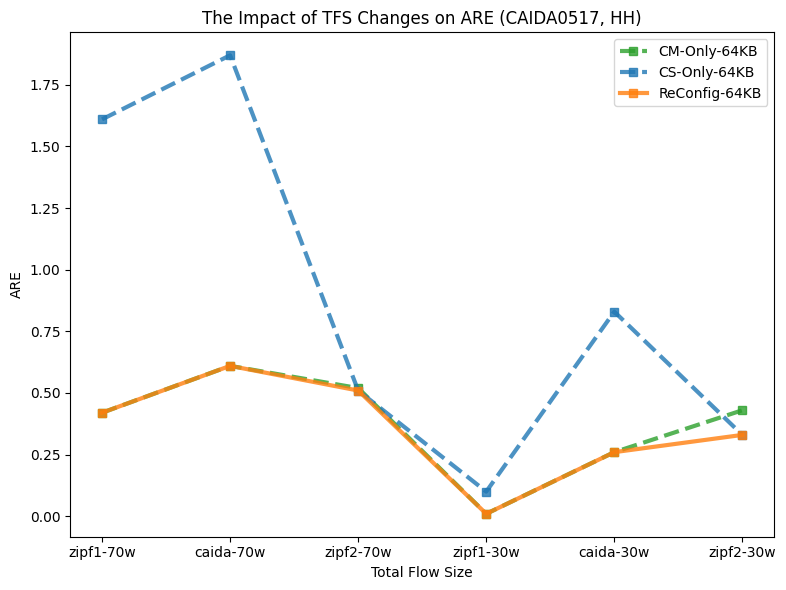

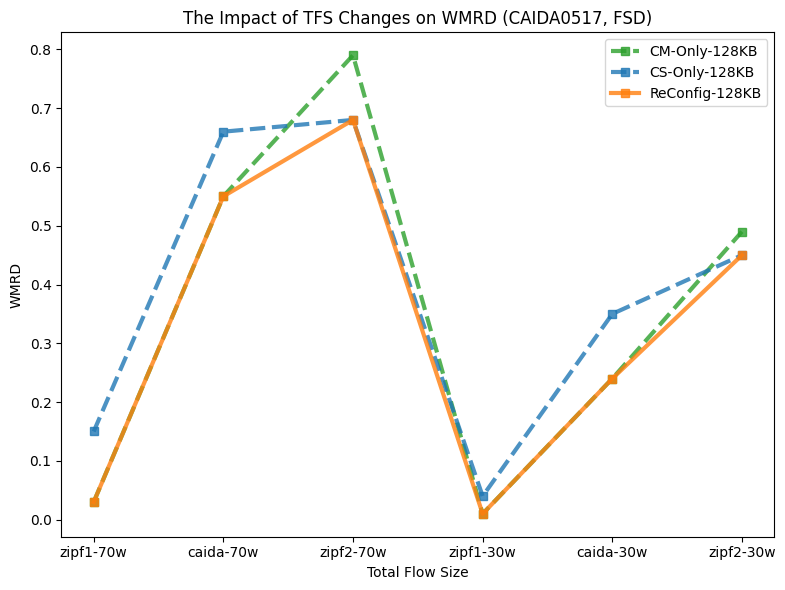

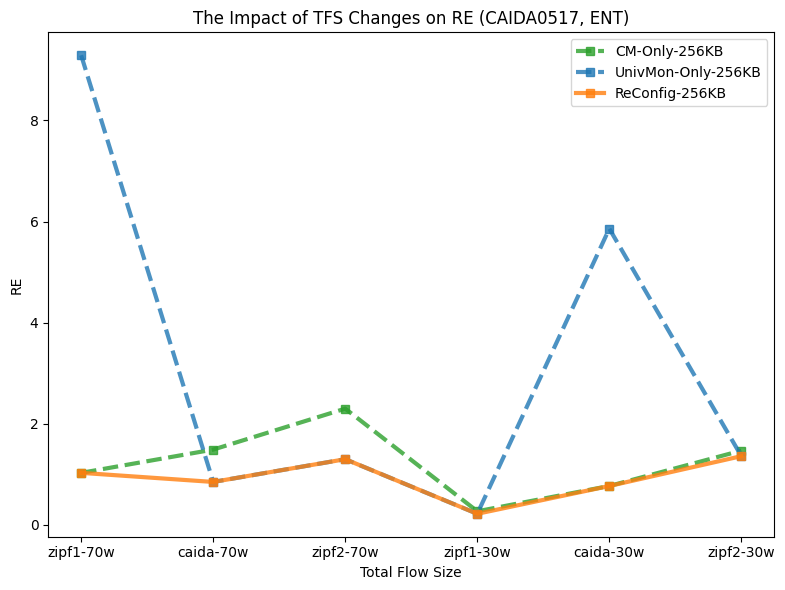

In [113]:
plot_hh_with_diff_tfs_linechart()
plot_fsd_with_diff_tfs_linechart()
plot_ent_with_diff_tfs_linechart()